<a href="https://colab.research.google.com/github/TSkinne4/MAT-421/blob/main/Module_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
Suppose that we want to find the integral of a function $f(x)$ on an interval $[a,b]$, that is, find the value of $\int_a^b f(x) dx$. To do this, we will use the following concepts

**Discretization of the Interval**

We will break up the interval into $n$ sub intervals of spacing $h=\frac{b-a}{h}$. 

**Points**

We observe the function at $n+1$, which we notate $x_0,x_1,...,x_{n-1},x_n$, where $x_0=a$ and $x_n=b$.

**Subinterval**

The intervals between spaces, notated $[x_i,x_{i+1}]$.

#Riemann Integral

Recall that one of the definitions of an integral is
  $$\int_a^b f(x) dx = \lim_{n→0}\sum_{i=0}^{n-1}\frac{b-a}{n}f(x_i)=\lim_{n→0}\sum_{i=1}^{n}\frac{b-a}{n}f(x_i).$$
Note that we can thus approximate the integral that we wish to find by using a finite number points instead of an infinite number of points. This means that we can approximate an integral as either of the following
$$\begin{align*}
\int_a^b f(x) dx &= \lim_{n→0}\sum_{i=0}^{n-1}\frac{b-a}{n}f(x_i)\\
\int_a^b f(x) dx&=\lim_{n→0}\sum_{i=1}^{n}\frac{b-a}{n}f(x_i)
\end{align*}.$$
These two forms are the left and right Reimann Sums, repsectively. 

To analyze the accuracy of this scheme, we will use the taylor expansion of $f(x)$ about a point $x_i$,
$$f(x)= f(x_i) + f'(x_i)(x-x_i)+....$$
Observing a subinterval $[x_i,x_{i+1}]$, we see that we get that
  $$
  \begin{align*}
  \int_{x_i}^{x_{i+1}}f(x)dx &=\int_{x_i}^{x_{i+1}}\left(f(x_i) + f'(x_i)(x-x_i)+...\right)dx \\
  &= hf(x_i) + \frac{h^2}{2}f'(x_i)+\mathcal{O}\left(h^3\right)\\
  &= h f(x_i) + \mathcal{O}\left(h^2\right)
  \end{align*}$$
Thus, we get that our error over a single subinterval is $\mathcal{O}(h^2)$
Summing over $n$ subintervals we and recalling that $n = \frac{b-a}{h}$, we get that for the whole interval we get an error $\mathcal{O}(h)$.

## Midpoint rule
For the midpoins rule, we define a new set of points where $y_{i} = \frac{x_{i+1}+x_{i}}{2}$. Using the Taylor Series about $y_i$, 
$$f(x) = f(y_i)+f'(y_i)(x-y_i)+\frac{f''(y_i)(x-y_i)^2}{2!}+...$$
From this, we see that
  $$\begin{align*}
    \int_{x_i}^{x_{i+1}}f(x)dx &= \int_{x_i}^{x_{i+1}}\left(f(y_i)+f'(y_i)(x-y_i)+\frac{f''(y_i)(x-y_i)^2}{2!}+...\right)dx\\
    &= \int_{x_i}^{x_{i+1}}f(y_i)dx+\int_{x_i}^{x_{i+1}}f'(y_i)(x-y_i)dx+\int_{x_i}^{x_{i+1}}\frac{f''(y_i)(x-y_i)^2}{2!}dx+...\\
    &= hf(y_i) + \mathcal{O}(h^3)
  \end{align*}$$
  Thus, we get that over the entire interval that the error is $\mathcal{O}(h^2)$. Note the benifit that we have more accuracy for the same amount of calcuations, but that we also may not know the value of the function between points.

The following code shows how the error changes when analyzing
$$\int_0^1e^xdx$$
as we vary h.

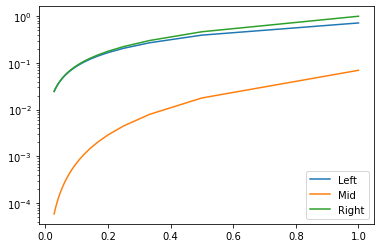

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def compute_errors(n,a,b):
  h = (b-a)/n
  intervals = np.linspace(a,b,n+1)
  midpoints = (intervals[1:]+intervals[:n])/2

  f_interval = np.exp(intervals)
  f_mid = np.exp(midpoints)

  left_riemann = h*np.sum(f_interval[:n])
  midpoint = h*np.sum(f_mid)
  right_riemann = h*np.sum(f_interval[1:])

  exact = np.exp(1)-np.exp(0)
  return h,np.abs(exact-left_riemann), np.abs(exact-midpoint),np.abs(exact-right_riemann)

h_list = []
l_error = []
m_error = []
r_error = []
for i in range(1,36):
  h,l,m,r = compute_errors(i,0,1)
  h_list.append(h)
  l_error.append(l)
  m_error.append(m)
  r_error.append(r)

plt.semilogy(h_list,l_error,label = 'Left')
plt.semilogy(h_list,m_error,label = 'Mid')
plt.semilogy(h_list,r_error,label = 'Right')
plt.legend()

#Trapezoid Rule

The trapezoid rule is similar to the Riemann sums that we observed before. The key difference, however, is that instead of appriximating the value of a function on an interval by a single points, we instead approximate the value using a linear function. That is, we assume
  $$\int_a^bf(x)dx\approx \sum_{i=0}^{n-1}h\frac{f(x_i)+f(x_{i+1})}{2}$$
This introduced extra computations, however, so by regrouping we can instead write
  $$\int_a^bf(x)dx\approx \frac{h}{2}\left(f(x_0)+2\sum_{i=1}^{n-1}f(x_i)+f(x_n)\right)$$
Recalling the Taylor series about the midpoint, we can se that we can write
$$f(x_i) = f(y_i) - \frac{hf'(y_i)}{2}+\frac{h^2f''(y_i)}{8}-...$$
and 
$$f(x_{i+1})=f(y_i) + \frac{hf'(y_i)}{2}+\frac{h^2f''(x_i)}{8}+...$$
We thus find that
$$\frac{f(x_{i+1})+f(x_i)}{2}=f(y_i)+\mathcal{O}(h^2)$$
from which we find
$$f(y_i)=\frac{f(x_{i+1})+f(x_i)}{2}+\mathcal{O}(h^2)$$
Recalling the integral of the midpoint rule, we get that
  $$\begin{align*}
  \int_{x_i}^{x_{i+1}}f(x) dx &= hf(y_i)+\mathcal{O}(h^3)\\
  &=  h\left(\frac{f(x_{i+1})+f(x_i)}{2}+\mathcal{O}(h^2)\right)+\mathcal{O}(h^3)\\
  &= h\left(\frac{f(x_{i+1})+f(x_i)}{2}\right)+\mathcal{O}(h^3)
  \end{align*}$$
Thus, we can see that we have an error $\mathcal{O}(h^3)$ over each subinterval, and so over the whole interval we have that the error is $\mathcal{O}(h^2)$

The following code compares the trapezoidal rule to the midpoint rule

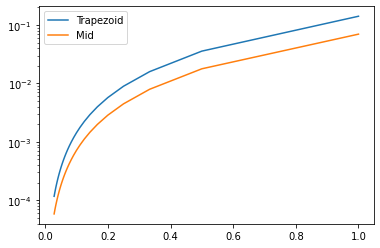

In [14]:
def compute_errors(n,a,b):
  h = (b-a)/n
  intervals = np.linspace(a,b,n+1)
  midpoints = (intervals[1:]+intervals[:n])/2

  f_interval = np.exp(intervals)
  f_mid = np.exp(midpoints)

  
  midpoint = h*np.sum(f_mid)
  trap = h/2*(f_interval[0]+f_interval[-1]+2*np.sum(f_interval[1:-1]))

  exact = np.exp(1)-np.exp(0)
  return h, np.abs(exact-midpoint), np.abs(exact-trap)

h_list = []
t_error = []
m_error = []

for i in range(1,36):
  h,m,t = compute_errors(i,0,1)
  h_list.append(h)
  t_error.append(t)
  m_error.append(m)

plt.semilogy(h_list,t_error,label = 'Trapezoid')
plt.semilogy(h_list,m_error,label = 'Mid')
plt.legend()